# DSGRN Python Interface Tutorial
This notebook shows the basics of manipulating DSGRN with the python interface.

In [3]:
import DSGRN

## Network
The starting point of the DSGRN analysis is a network specification.
We write each node name, a colon, and then a formula specifying how it reacts to its inputs.

In [8]:
network = DSGRN.Network("""
X1 : (X1+X2)(~X3)
X2 : (X1)
X3 : (X1)(~X2)""")

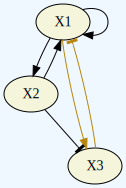

In [9]:
DSGRN.DrawGraph(network)

## ParameterGraph
Given a network, there is an associated "Parameter Graph", which is a combinatorial representation of parameter space.

In [10]:
parametergraph = DSGRN.ParameterGraph(network)

In [11]:
print("There are " + str(parametergraph.size()) + " nodes in the parameter graph.")

There are 326592 nodes in the parameter graph.


## Parameter
The `ParameterGraph` class may be regarded as a factory which produces parameter nodes. In the DSGRN code, parameter nodes are referred to simply as "parameters" and are represented as "Parameter" objects.

In [12]:
parameterindex = 34892  # An arbitrarily selected integer in [0,326592)

In [13]:
parameter = parametergraph.parameter(parameterindex)

In [14]:
print(parameter)

[["X1",[3,3,"6D9000"],[0,2,1]],["X2",[1,2,"D"],[0,1]],["X3",[2,1,"8"],[0]]]


## DomainGraph
Let's compute the dynamics corresponding to this parameter node. In particular, we can instruct DSGRN to create a "domaingraph" object.

In [15]:
domaingraph = DSGRN.DomainGraph(parameter)

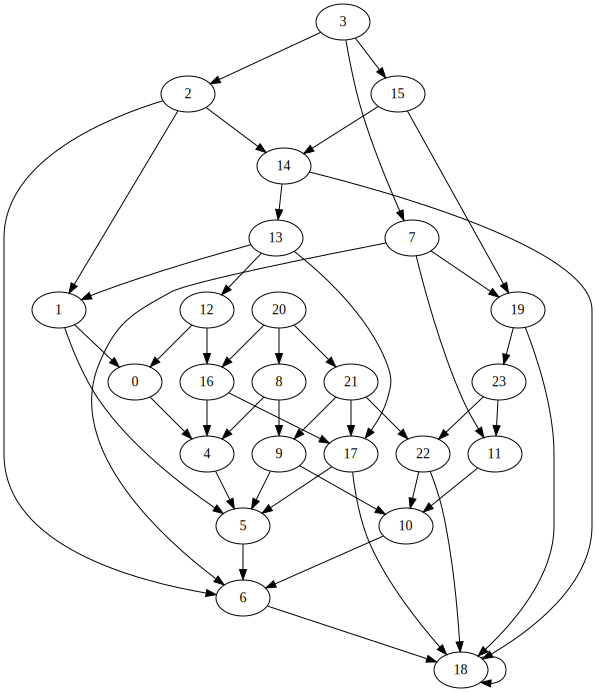

In [16]:
DSGRN.DrawGraph(domaingraph)

In [17]:
print(domaingraph.coordinates(5)) # ... I wonder what region in phase space domain 5 corresponds to.

[1, 1, 0]


## MorseDecomposition
Let's compute the partially ordered set of recurrent components (strongly connected components with an edge) of the domain graph.

In [23]:
morsedecomposition = DSGRN.MorseDecomposition(domaingraph.digraph())

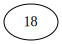

In [24]:
DSGRN.DrawGraph(morsedecomposition)

## MorseGraph
The final step in our analysis is the production of an annotated Morse graph.

In [20]:
morsegraph = DSGRN.MorseGraph(domaingraph, morsedecomposition)

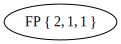

In [21]:
DSGRN.DrawGraph(morsegraph)

# Drawing Tables

In [3]:
from DSGRN import *
pg = ParameterGraph(Network("X : ~Y\nY : ~X\n"))

In [4]:
Table(["Parameter Index", "Morse Graph"], 
      [ [ i, DrawGraph(MorseGraph(DomainGraph(pg.parameter(i))))] for i in range(0,pg.size())])

Parameter Index,Morse Graph
0,"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.40.1 (20161225.0304) --> <!-- Title: %3 Pages: 1 --> %3 <!-- 0 --> 0 FP { 0, 0 }"
1,"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.40.1 (20161225.0304) --> <!-- Title: %3 Pages: 1 --> %3 <!-- 0 --> 0 FP { 1, 0 }"
2,"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.40.1 (20161225.0304) --> <!-- Title: %3 Pages: 1 --> %3 <!-- 0 --> 0 FP { 1, 0 }"
3,"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.40.1 (20161225.0304) --> <!-- Title: %3 Pages: 1 --> %3 <!-- 0 --> 0 FP { 0, 1 }"
4,"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.40.1 (20161225.0304) --> <!-- Title: %3 Pages: 1 --> %3 <!-- 0 --> 0 FP { 0, 1 } <!-- 1 --> 1 FP { 1, 0 }"
5,"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.40.1 (20161225.0304) --> <!-- Title: %3 Pages: 1 --> %3 <!-- 0 --> 0 FP { 1, 0 }"
6,"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.40.1 (20161225.0304) --> <!-- Title: %3 Pages: 1 --> %3 <!-- 0 --> 0 FP { 0, 1 }"
7,"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.40.1 (20161225.0304) --> <!-- Title: %3 Pages: 1 --> %3 <!-- 0 --> 0 FP { 0, 1 }"
8,"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.40.1 (20161225.0304) --> <!-- Title: %3 Pages: 1 --> %3 <!-- 0 --> 0 FP { 1, 1 }"
